# TD noté

In [188]:
import pandas as pd

In [189]:
file_path = "METABRIC_RNA_Mutation.csv"
metabric_data = pd.read_csv(file_path, sep=',', header=0, index_col=0)
metabric_data.head()

C:\Users\spoto\AppData\Local\Temp\ipykernel_16896\4104476192.py:2: DtypeWarning: Columns (678,688,690,692) have mixed types. Specify dtype option on import or set low_memory=False.
  metabric_data = pd.read_csv(file_path, sep=',', header=0, index_col=0)


,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,er_status,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
patient_id,,,,,,,,,,,,,,,,,,,,,
0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,Positive,...,0,0,0,0,0,0,0,0,0,0
2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,Positive,...,0,0,0,0,0,0,0,0,0,0
5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,Positive,...,0,0,0,0,0,0,0,0,0,0
6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,Positive,...,0,0,0,0,0,0,0,0,0,0
8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,Positive,...,0,0,0,0,0,0,0,0,0,0


In [190]:
metabric_data = metabric_data.iloc[:, :519]
key_name = "nottingham_prognostic_index"  # metabric_data.columns[20]
start_genes_idx = 30
corre = []
for i in range(start_genes_idx, metabric_data.shape[1]):
    correlation = metabric_data[key_name].corr(metabric_data.iloc[:, i]) ** 2
    corre.append(correlation)

best_idx = sorted(range(len(corre)),
                  key=lambda i: corre[i], reverse=True)[0:100]
best_idx = [i + start_genes_idx for i in best_idx]

metabric_data_clean = metabric_data.iloc[:, list(range(30)) + best_idx]
metabric_data_clean.iloc[:, 25:35].head()

,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer,aurka,chek1,aph1b,cdk1,bcl2
patient_id,,,,,,,,,,
0,1,ER-/HER2-,22.0,2.0,Living,-1.5733,-1.6332,-0.0098,-2.0649,0.5371
2,1,ER+/HER2- High Prolif,10.0,1.0,Living,-0.3052,-0.9604,0.6880,0.3895,0.3243
5,0,NaN,15.0,2.0,Died of Disease,-0.2248,0.7585,-0.4959,1.2949,-1.0989
6,1,NaN,25.0,2.0,Living,2.0447,-0.8414,-1.2458,0.0476,0.2252
8,1,ER+/HER2- High Prolif,40.0,2.0,Died of Disease,0.5882,0.4420,0.3690,1.1035,-1.2477


## Question 1
### Creation de l'ACP normée

In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming 'metabric_data_clean' is your dataset
interpretation_data = metabric_data_clean.iloc[:, :30]
genes_data = metabric_data_clean.iloc[:, 30:]

# Standardize the genes data
scaler = StandardScaler()
genes_data_scaled = scaler.fit_transform(genes_data)

# Perform PCA
pca = PCA()
principal_components = pca.fit_transform(genes_data_scaled)

# Create a DataFrame with PCA results
n_components = pca.n_components_
pc_columns = [f'PC{i}' for i in range(1, n_components + 1)]
pc_df = pd.DataFrame(data=principal_components, columns=pc_columns)

# Explained Variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

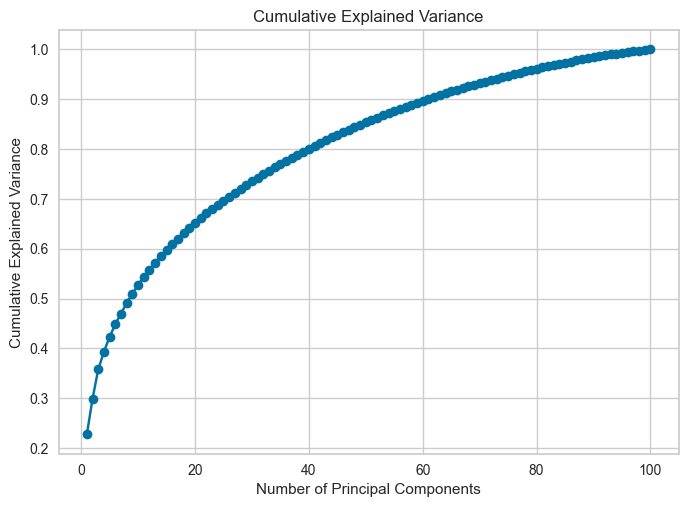

0.8066177973266792


In [192]:
# Plot Cumulative Explained Variance
plt.plot(range(1, n_components + 1), cumulative_variance_ratio, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

print(cumulative_variance_ratio[40])

40 axes permettent d'expliquer 80% de la variance totale. On peut donc se contenter de 40 axes pour la suite de l'analyse.

## Question 2 (Kmeans with different number of clusters)

In [193]:
pca = PCA(n_components=40)
principal_components = pca.fit_transform(genes_data_scaled)
pc_columns = [f'PC{i}' for i in range(1, 41)]

interpretation_data = interpretation_data.reset_index(drop=True)
principal_components = pd.DataFrame(
    data=principal_components, columns=pc_columns).reset_index(drop=True)

# Concatenating the DataFrames
data_after_pca = pd.concat([interpretation_data, principal_components], axis=1)

data_after_pca.head()

,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,er_status,...,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40
0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,Positive,...,0.234334,-0.219412,-0.411006,0.116145,-0.004126,-0.057676,0.436967,-1.521692,-0.829972,-0.525666
1,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,Positive,...,0.235801,-0.023642,0.448805,-0.025235,-1.216496,-1.268197,-2.193881,0.476418,0.463269,-0.399822
2,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,Positive,...,-1.412357,1.770560,0.305331,1.052745,-0.143038,0.141607,0.233476,0.143075,1.089257,-0.162509
3,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,Positive,...,-0.431155,-0.424455,0.225836,-0.453003,0.480963,-0.456783,0.901561,-0.191179,0.650771,-1.891223
4,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,Positive,...,-0.358924,0.598445,0.403316,-0.008496,-1.554535,0.969981,1.247974,0.705076,-0.115466,1.072037


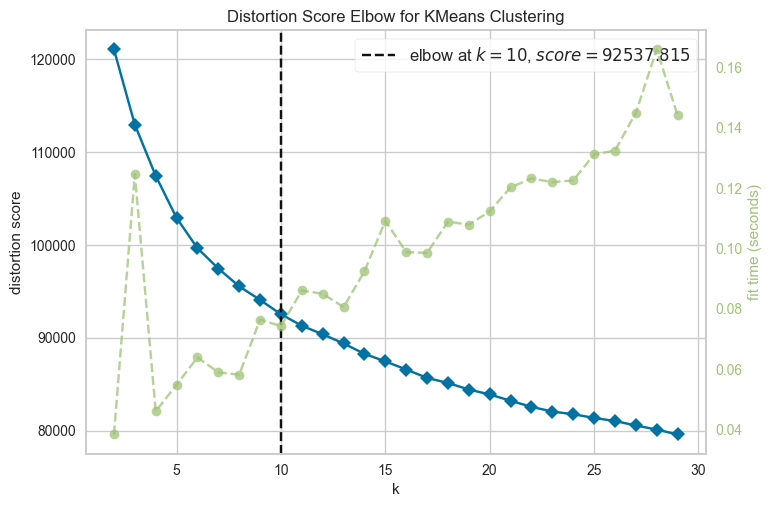

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [194]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans_models = []
wcss_scores = []

# n_init set (randomely) to avoid warning
km = KMeans(random_state=42, n_init=10)
visualizer = KElbowVisualizer(km, k=(2, 30))

visualizer.fit(principal_components)
visualizer.show()

La meilleure valeure de k semble être 9 d'après la méthode du coude (varie entre 8 et 10 selon la génération). Appliquons donc l'algorithme des kmeans avec k=9 pour classer les patientes.

In [195]:
k = 9
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
labels = kmeans.fit_predict(principal_components)

# Add the labels to the data_after_pca DataFrame
data_after_pca['Cluster'] = labels

## Question 3 (plotting the clusters)

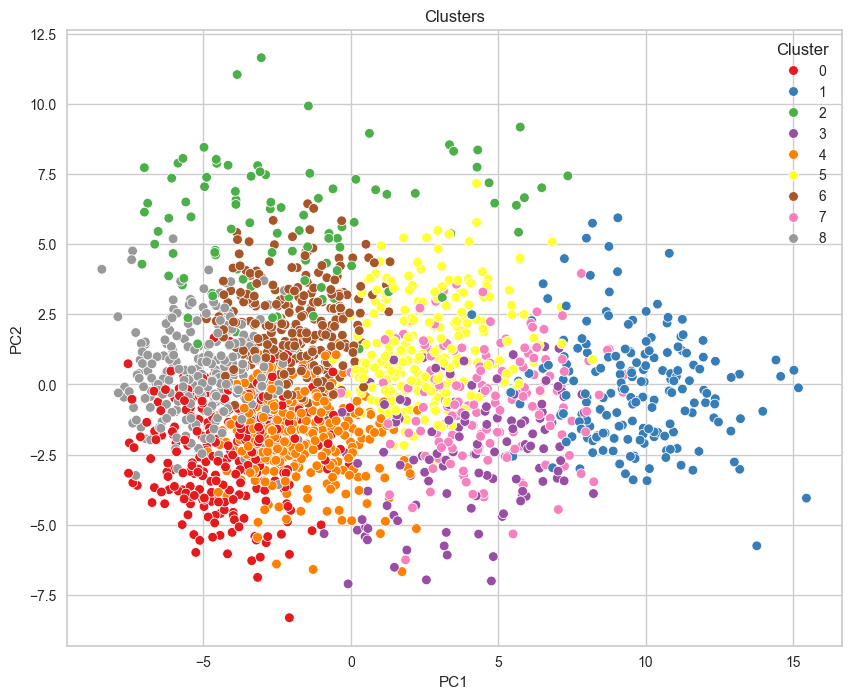

In [196]:
# Plot the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=data_after_pca, palette='Set1')
plt.title('Clusters')
plt.show()

Voyons ce que cela aurait donnée sans la PCA

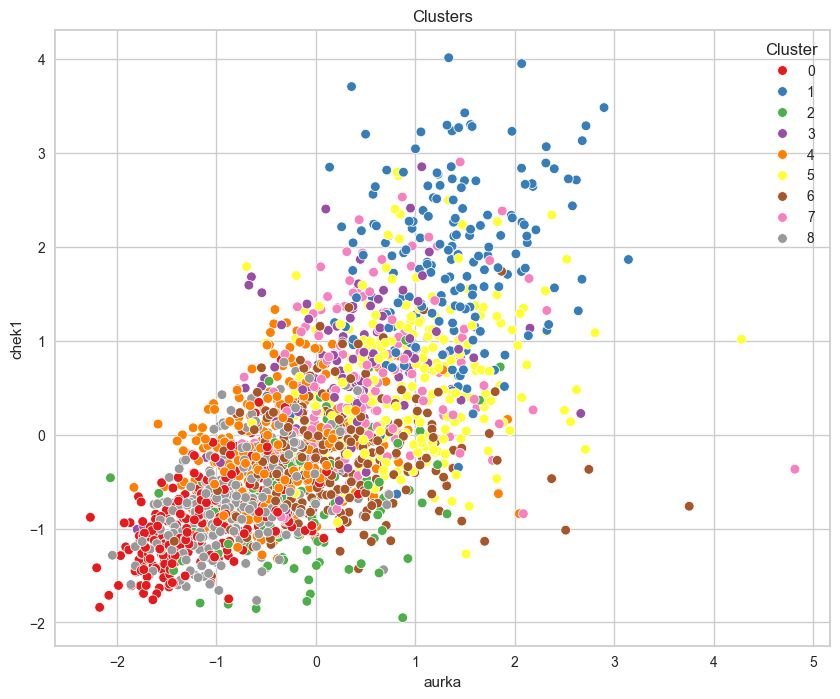

In [197]:

data = metabric_data_clean.copy()
data['Cluster'] = labels

# Plot the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='aurka', y='chek1', hue='Cluster', data=data, palette='Set1')
plt.title('Clusters')
plt.show()

On remarque que l'ACP permet de mieux séparer les clusters avec kmeans. En effet les clusters sont plus compacts et plus séparés dans l'espace des composantes principales.

## Question 4 (Interpretation)

In [201]:
from scipy.stats import chi2_contingency
quantitative_vars_idx = {1, 19, 20, 21, 23, 28}
# python starts at 0 and not 1 like R
quantitative_vars_idx = {idx-1 for idx in quantitative_vars_idx}
qualitative_vars_idx = set(range(30)) - quantitative_vars_idx

quali_cols = data_after_pca.columns[list(qualitative_vars_idx)]
print(quali_cols)

# data_after_pca has a column named 'Cluster'

# Perform chi-square tests for each qualitative variable
chi2_results = []
for col in quali_cols:
    chi2, p, dof, expected = chi2_contingency(pd.crosstab(data_after_pca['Cluster'], data_after_pca[col]))
    chi2_results.append([col, chi2, p])

# Create a DataFrame with the results
chi2_results_df = pd.DataFrame(chi2_results, columns=['Variable', 'Chi2', 'p-value'])

# Sort the DataFrame by p-value
chi2_results_df.sort_values(by='p-value', ascending=True, inplace=True)
chi2_results_df.reset_index(drop=True, inplace=True)

# Print the results
print(chi2_results_df)



Index(['type_of_breast_surgery', 'cancer_type', 'cancer_type_detailed',
       'cellularity', 'chemotherapy', 'pam50_+_claudin-low_subtype', 'cohort',
       'er_status_measured_by_ihc', 'er_status', 'neoplasm_histologic_grade',
       'her2_status_measured_by_snp6', 'her2_status',
       'tumor_other_histologic_subtype', 'hormone_therapy',
       'inferred_menopausal_state', 'integrative_cluster',
       'primary_tumor_laterality', 'oncotree_code', 'overall_survival',
       'pr_status', 'radio_therapy', '3-gene_classifier_subtype',
       'tumor_stage', 'death_from_cancer'],
      dtype='object')
                          Variable         Chi2        p-value
0        3-gene_classifier_subtype  2407.088706   0.000000e+00
1      pam50_+_claudin-low_subtype  3150.182381   0.000000e+00
2              integrative_cluster  3000.926987   0.000000e+00
3                        er_status  1307.597161  5.358696e-277
4        er_status_measured_by_ihc  1109.627171  3.192727e-234
5        neoplas